# 1. Define the Problem

In [22]:
#the goal is to classify mushrooms as edible or poisonous based on their features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<Axes: xlabel='count', ylabel='class'>

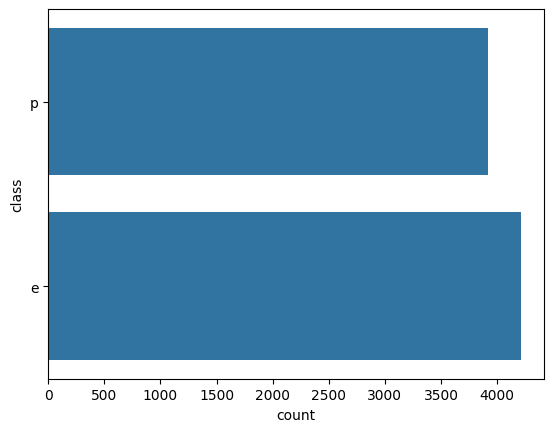

In [5]:
sns.countplot(data['class'])

<Figure size 1400x600 with 0 Axes>

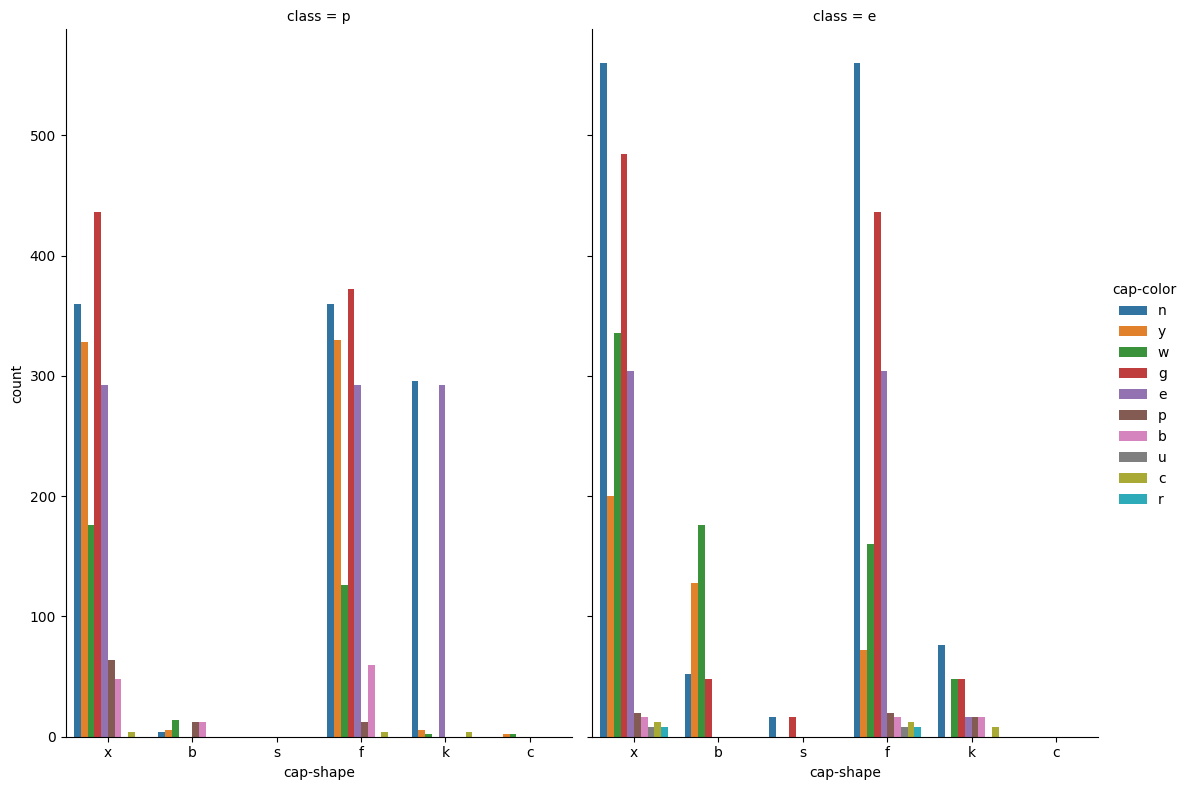

In [6]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="cap-shape",hue="cap-color",col="class",
                data=data,kind="count",height=8,aspect=.7)

<Figure size 1400x600 with 0 Axes>

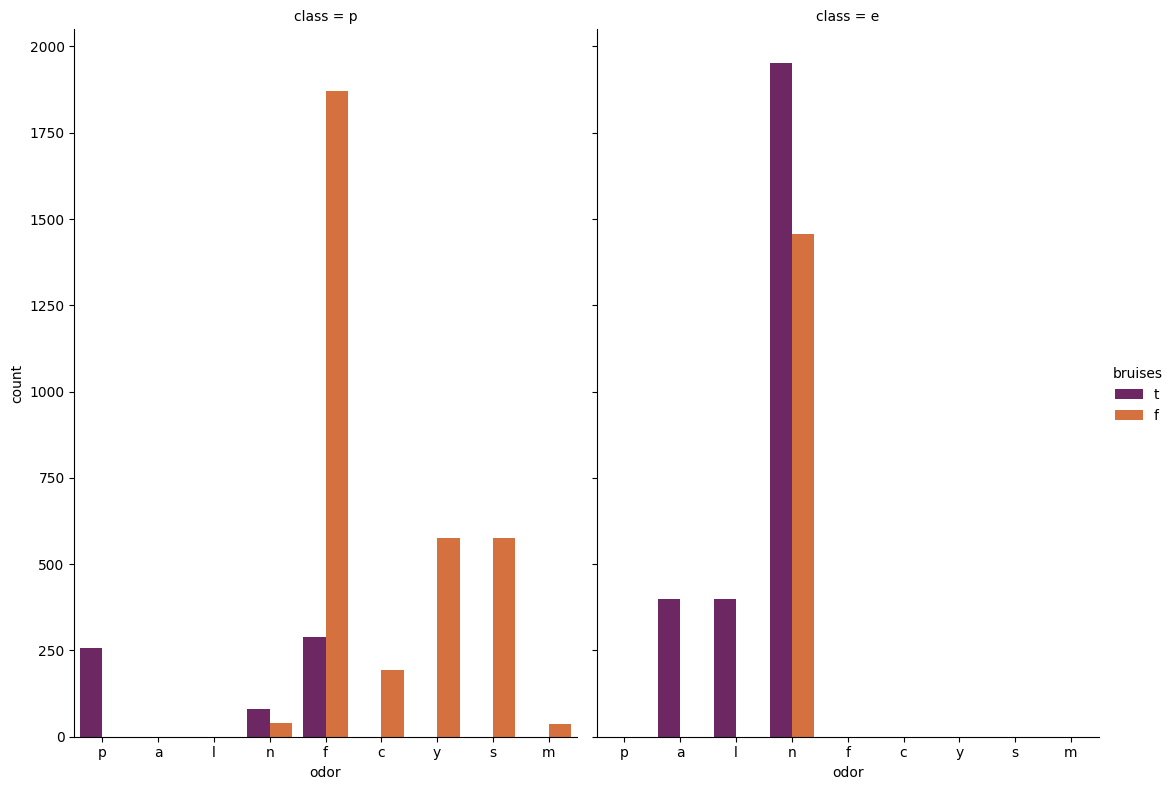

In [7]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor",hue="bruises",col="class",data=data, kind="count",
            height=8, aspect=.7 , palette = 'inferno')

In [8]:
# Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [10]:
x = data.drop(['class'], axis =1)
y = data['class']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Decision Tree model

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0, max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [13]:
dt.score(x_train, y_train)

0.9778403095321843

In [14]:
predictions = dt.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9827727645611156

# Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 5)

In [17]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9899753781217024

In [18]:
predictions = model.predict(x_test)
model.score(x_test,y_test)

0.9905660377358491

In [19]:
accuracy_score(y_test, predictions)

0.9905660377358491

In [20]:
import pickle

In [21]:
with open('mushroom_classifier.pkl','wb') as file:
    pickle.dump(model, file)
    print("Model saved successfully!")

Model saved successfully!
